In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
dictionary=pd.read_csv('data/data_dictionary.csv')
product_info=pd.read_csv('data/products.csv')
orders= pd.read_csv('data/orders.csv')     
order_items= pd.read_csv('data/order_items.csv')
refund_table=pd.read_csv('data/order_item_refunds.csv')
pageviews=pd.read_csv('data/website_pageviews.csv')
sessions=pd.read_csv('data/website_sessions.csv')

In [5]:
dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed


## Product Information

In [6]:
product_info

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


In [7]:
product_info.dtypes

product_id       int64
created_at      object
product_name    object
dtype: object

In [8]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [9]:
orders.columns

Index(['order_id', 'created_at', 'website_session_id', 'user_id',
       'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'],
      dtype='object')

In [10]:
orders.isnull().sum()

order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64

In [11]:
orders.dtypes

order_id                int64
created_at             object
website_session_id      int64
user_id                 int64
primary_product_id      int64
items_purchased         int64
price_usd             float64
cogs_usd              float64
dtype: object

In [12]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [13]:
sales=orders["price_usd"].sum()
sales

1938509.7500000002

### Average Order Value

In [14]:
average_order_value = orders["price_usd"].mean()
average_order_value

59.99163649305234

In [15]:
order_items

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49
...,...,...,...,...,...,...,...
40020,40021,2015-03-19 04:10:43,32310,4,1,29.99,9.49
40021,40022,2015-03-19 05:27:28,32311,2,1,59.99,22.49
40022,40023,2015-03-19 05:27:28,32311,4,0,29.99,9.49
40023,40024,2015-03-19 05:35:57,32312,4,1,29.99,9.49


In [16]:
order_items.columns

Index(['order_item_id', 'created_at', 'order_id', 'product_id',
       'is_primary_item', 'price_usd', 'cogs_usd'],
      dtype='object')

In [17]:
order_items.isnull().sum()

order_item_id      0
created_at         0
order_id           0
product_id         0
is_primary_item    0
price_usd          0
cogs_usd           0
dtype: int64

In [18]:
order_items.dtypes

order_item_id        int64
created_at          object
order_id             int64
product_id           int64
is_primary_item      int64
price_usd          float64
cogs_usd           float64
dtype: object

In [19]:
total_orders=order_items.order_item_id.nunique()
total_orders

40025

## Units Sold Per Product

In [20]:
product_sales =order_items.groupby("product_id").size().reset_index(name="total_units_sold").sort_values("total_units_sold", ascending=False)
product_sales

,product_id,total_units_sold
0,1,24226
1,2,5796
3,4,5018
2,3,4985


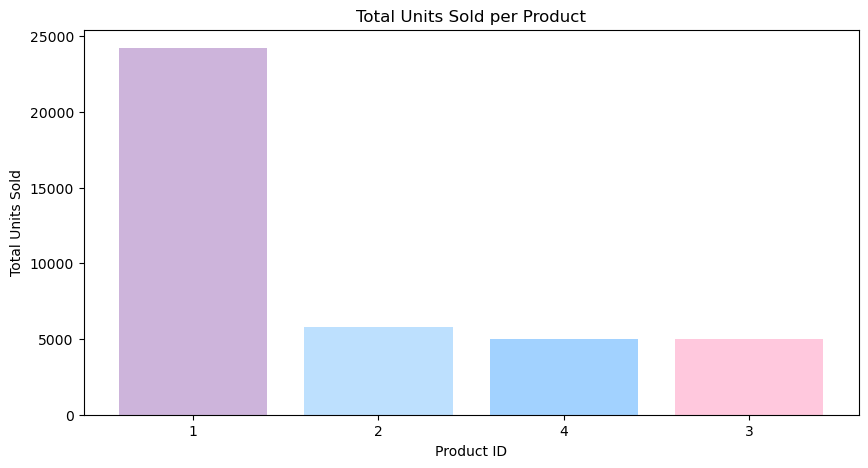

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(product_sales["product_id"].astype(str), product_sales["total_units_sold"],color=['#cdb4db', '#bde0fe', '#a2d2ff', '#ffc8dd'])
plt.xlabel("Product ID")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold per Product")
plt.show()


* This bar chart shows the total number of units sold for each product (by Product ID).
* Product 1 has significantly higher sales volume compared to the other products.
* Products 2, 3, and 4 have much lower and fairly similar sales volumes, indicating one clear best-seller and three lower-performing products.

In [22]:
order_items['price_usd'].unique()

array([49.99, 59.99, 45.99, 29.99])

### Unique price per Product

In [23]:
order_items.groupby("product_id")["price_usd"].unique()


product_id
1    [49.99]
2    [59.99]
3    [45.99]
4    [29.99]
Name: price_usd, dtype: object

In [24]:
refund_table

,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:43,57,57,49.99
1,2,2012-04-13 01:09:43,74,74,49.99
2,3,2012-04-15 07:03:48,71,71,49.99
3,4,2012-04-17 20:00:37,118,118,49.99
4,5,2012-04-22 20:53:49,116,116,49.99
...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99
1727,1728,2015-03-30 21:33:51,39671,32049,49.99
1728,1729,2015-03-31 19:59:48,39729,32090,49.99
1729,1730,2015-04-01 03:54:48,39717,32079,59.99


In [25]:
refund_table.columns

Index(['order_item_refund_id', 'created_at', 'order_item_id', 'order_id',
       'refund_amount_usd'],
      dtype='object')

In [26]:
total_refund=refund_table["order_item_id"].nunique()
total_refund

1731

In [27]:
actual_orders=total_orders-total_refund
actual_orders

38294

In [28]:
refund_amt=refund_table["refund_amount_usd"].sum()
refund_amt

85338.69

### Average Refund

In [29]:
refund_mean=refund_table["refund_amount_usd"].mean()
refund_mean

49.3002253032929

In [30]:
refunds_per_order = (refund_table.groupby("order_id")["refund_amount_usd"].sum().reset_index(name="total_refunded_usd"))
refunds_per_order

,order_id,total_refunded_usd
0,57,49.99
1,71,49.99
2,74,49.99
3,116,49.99
4,118,49.99
...,...,...
1718,32152,49.99
1719,32156,45.99
1720,32191,49.99
1721,32252,45.99


In [31]:
cogs_per_order = (order_items.groupby("order_item_id")["cogs_usd"].sum().reset_index(name="total_cogs_usd"))
cogs_per_order

,order_item_id,total_cogs_usd
0,1,19.49
1,2,19.49
2,3,19.49
3,4,19.49
4,5,19.49
...,...,...
40020,40021,9.49
40021,40022,22.49
40022,40023,9.49
40023,40024,9.49


## Refunds Merged with Order Items

In [32]:
refunds_items = pd.merge( refund_table, order_items, on="order_item_id")
refunds_items


,order_item_refund_id,created_at_x,order_item_id,order_id_x,refund_amount_usd,created_at_y,order_id_y,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-04-06 11:32:43,57,57,49.99,2012-03-31 02:32:43,57,1,1,49.99,19.49
1,2,2012-04-13 01:09:43,74,74,49.99,2012-04-03 19:09:43,74,1,1,49.99,19.49
2,3,2012-04-15 07:03:48,71,71,49.99,2012-04-03 15:03:48,71,1,1,49.99,19.49
3,4,2012-04-17 20:00:37,118,118,49.99,2012-04-15 09:00:37,118,1,1,49.99,19.49
4,5,2012-04-22 20:53:49,116,116,49.99,2012-04-13 14:53:49,116,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99,2015-03-18 10:37:23,32255,2,1,59.99,22.49
1727,1728,2015-03-30 21:33:51,39671,32049,49.99,2015-03-15 15:33:51,32049,1,1,49.99,19.49
1728,1729,2015-03-31 19:59:48,39729,32090,49.99,2015-03-16 10:59:48,32090,1,1,49.99,19.49
1729,1730,2015-04-01 03:54:48,39717,32079,59.99,2015-03-16 08:54:48,32079,2,0,59.99,22.49


In [33]:
refund_counts = refunds_items.groupby('product_id')['order_item_id'].count().reset_index()
refund_counts.columns = ['product_id', 'total_refunds']

### Total refunds per product

In [34]:
refund_counts

,product_id,total_refunds
0,1,1237
1,2,129
2,3,301
3,4,64


In [35]:
prod_refund = pd.merge( refund_counts, product_sales, on="product_id")
prod_refund

,product_id,total_refunds,total_units_sold
0,1,1237,24226
1,2,129,5796
2,3,301,4985
3,4,64,5018


### Refund Rate

In [36]:
prod_refund["refund_rate_%"]=(prod_refund['total_refunds']/prod_refund['total_units_sold'])*100

In [37]:
prod_refund

,product_id,total_refunds,total_units_sold,refund_rate_%
0,1,1237,24226,5.106084
1,2,129,5796,2.225673
2,3,301,4985,6.038114
3,4,64,5018,1.275409


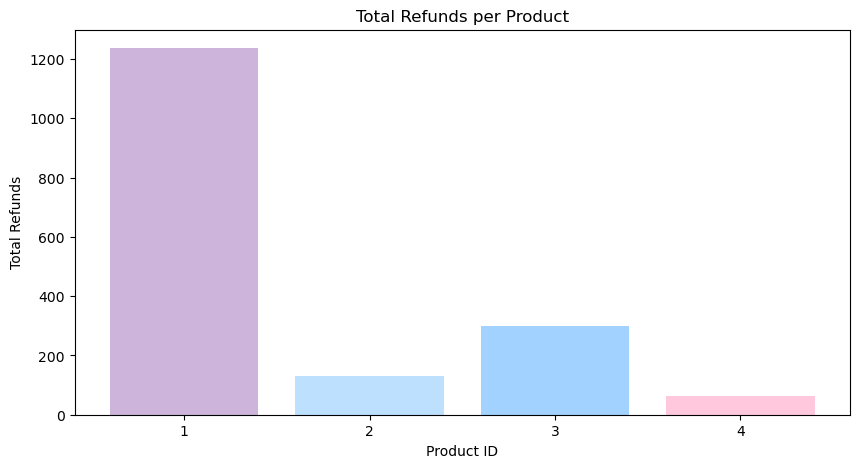

In [38]:
plt.figure(figsize=(10,5))
plt.bar(refund_counts['product_id'].astype(str), refund_counts['total_refunds'],color=['#cdb4db', '#bde0fe', '#a2d2ff', '#ffc8dd'])
plt.xlabel("Product ID")
plt.ylabel("Total Refunds")
plt.title("Total Refunds per Product")
plt.show()

* This bar chart shows the total number of refunds for each product (by Product ID).
* Product 1 has a significantly higher number of refunds compared to all other products.
* Product 3 has moderate refunds, while Products 2 and 4 have relatively low refund counts, indicating fewer return issues for those items.

In [39]:
sales_per_product = order_items.groupby('product_id')['price_usd'].sum().reset_index()
sales_per_product.columns = ['product_id', 'sales_revenue']
sales_per_product 

,product_id,sales_revenue
0,1,1211057.74
1,2,347702.04
2,3,229260.15
3,4,150489.82


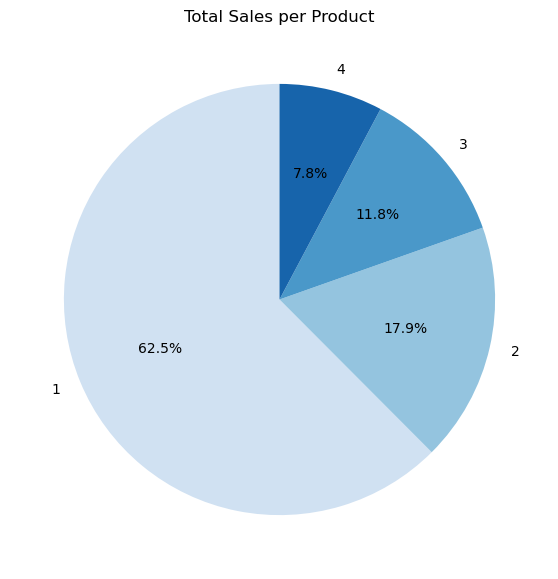

In [40]:
colors = sns.color_palette("Blues", len(sales_per_product))
plt.figure(figsize=(7,7))
plt.pie(sales_per_product['sales_revenue'],labels=sales_per_product['product_id'].astype(str),autopct='%1.1f%%',startangle=90,colors=colors)
plt.title("Total Sales per Product")
plt.show()


* Product 1 contributes the largest share of total sales, making it the main revenue driver.
* Product 2 and Product 3 have moderate contributions to total sales.
* Product 4 contributes the smallest share, indicating relatively lower sales performance.

In [41]:
refund_per_product = refunds_items.groupby('product_id')['refund_amount_usd'].sum().reset_index()


In [42]:
refund_per_product

,product_id,refund_amount_usd
0,1,61837.63
1,2,7738.71
2,3,13842.99
3,4,1919.36


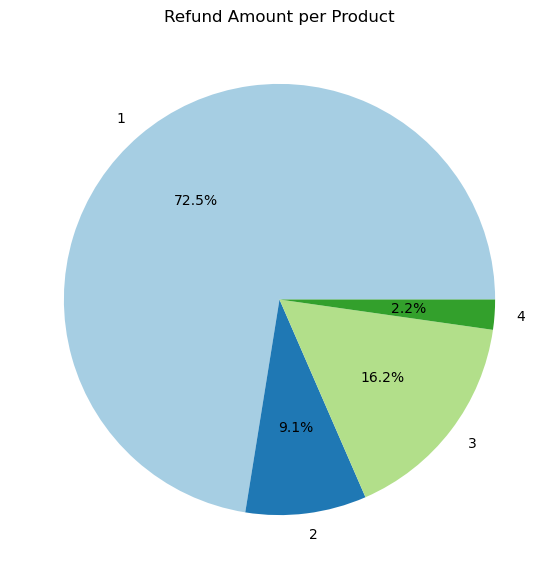

In [43]:
plt.figure(figsize=(7,7))

plt.pie(
    refund_per_product['refund_amount_usd'],
    labels=refund_per_product['product_id'].astype(str),
    autopct='%1.1f%%',
    colors=sns.color_palette("Paired", len(refund_per_product))
)

plt.title("Refund Amount per Product")
plt.show()

* Product 1 accounts for the majority of the total refund amount.
* Product 3 and Product 2 contribute smaller but noticeable portions of refunds.
* Product 4 has the least share in total refunds, indicating fewer refund issues compared to others.

In [ ]:
Orders increase sharply from 2012 to 2014, showing strong business growth.

The peak is around 2014, after which there is a noticeable decline.

This indicates a growth phase followed by a slowdown in order volume

In [44]:
prod_info=pd.merge(sales_per_product,refund_per_product,on='product_id')

In [45]:
prod_info

,product_id,sales_revenue,refund_amount_usd
0,1,1211057.74,61837.63
1,2,347702.04,7738.71
2,3,229260.15,13842.99
3,4,150489.82,1919.36


In [46]:
prod_info['net_revenue'] = prod_info['sales_revenue'] - prod_info['refund_amount_usd']



In [47]:
prod_info

,product_id,sales_revenue,refund_amount_usd,net_revenue
0,1,1211057.74,61837.63,1149220.11
1,2,347702.04,7738.71,339963.33
2,3,229260.15,13842.99,215417.16
3,4,150489.82,1919.36,148570.46


## Total net revenue

In [48]:
prod_info['net_revenue'].sum()

1853171.06

C:\Users\Admin\AppData\Local\Temp\ipykernel_25068\4059377519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='Paired')


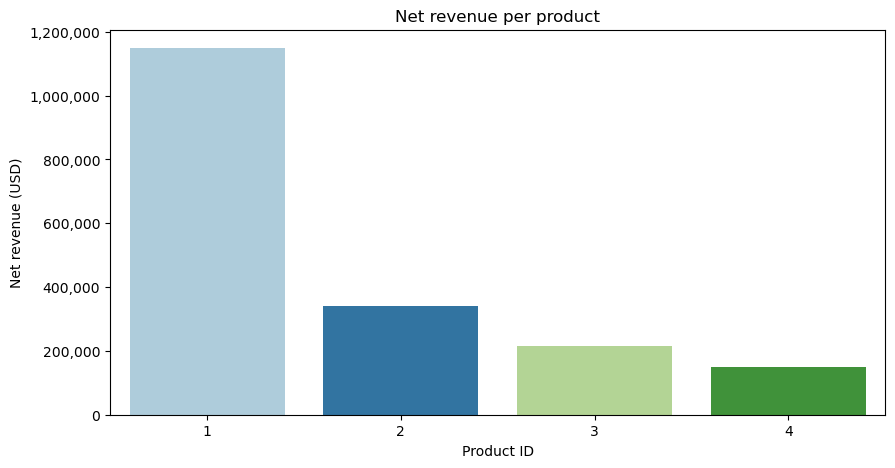

In [49]:
plt.figure(figsize=(10,5))
sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='Paired')
plt.xlabel("Product ID")
plt.ylabel("Net revenue (USD)")
plt.title("Net revenue per product")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

* Product 1 generates the highest net revenue by a large margin, making it the most profitable product.
* Product 2 is the second-best performer, but its net revenue is far lower than Product 1.
* Product 3 and Product 4 contribute significantly less to net revenue compared to the top two.
* Overall, the business is heavily dependent on Product 1 for net revenue, indicating a concentration risk.

## Customer Lifecycle Analysis

In [50]:
user_orders = orders.groupby("user_id")["order_id"].count().reset_index()
user_orders.columns = ["user_id", "total_orders"]


In [51]:
user_orders["user_type"] = "New User"
user_orders.loc[user_orders["total_orders"] > 1, "user_type"] = "Repeat User"


In [52]:
user_counts =user_orders["user_type"].value_counts()
user_counts

user_type
New User       31105
Repeat User      591
Name: count, dtype: int64

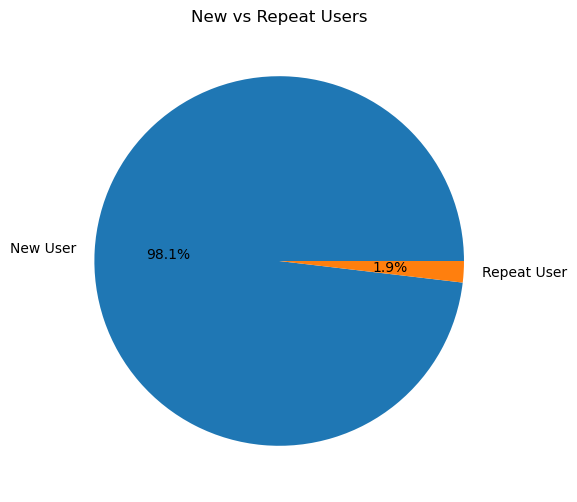

In [53]:
plt.figure(figsize=(6,6))
plt.pie(user_counts.values, labels=user_counts.index, autopct='%1.1f%%')
plt.title("New vs Repeat Users")
plt.show()

* Compares new customers and repeat customers.
* Majority of customers are new customers.
* Indicates good customer acquisition but low repeat purchase rate.

# Overall Trends

In [54]:
orders["created_at"] = pd.to_datetime(orders["created_at"])


In [55]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [56]:
orders['created_at'].dt.year.unique()


array([2012, 2013, 2014, 2015])

In [57]:
yearly_orders = orders.groupby(orders['created_at'].dt.year).size().reset_index(name="Sales_per_year")
yearly_orders


,created_at,Sales_per_year
0,2012,2586
1,2013,7447
2,2014,16860
3,2015,5420


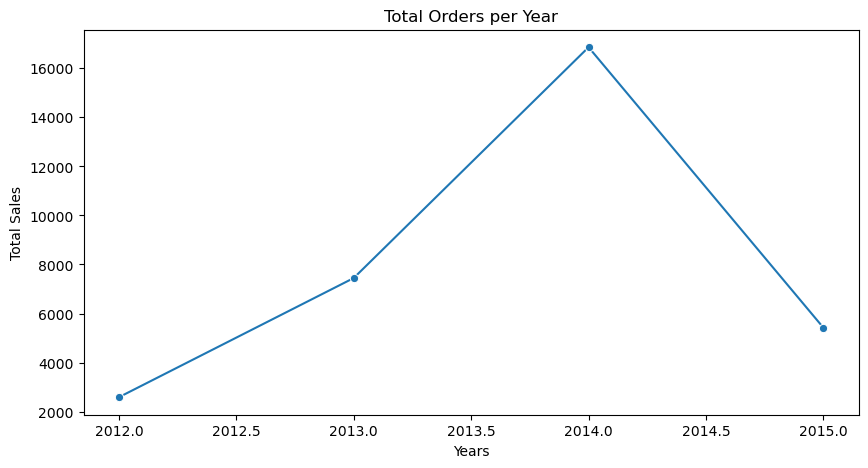

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_orders, x='created_at', y='Sales_per_year', marker='o')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.title("Total Orders per Year")
plt.show()


* Orders increased steadily from 2012 to 2014, showing strong growth in business activity.
* The highest number of orders was recorded in 2014, making it the peak year.
* In 2015, there is a sharp decline in total orders compared to 2014.
* Overall, the trend shows growth followed by a drop, which may indicate market changes or incomplete data for 2015.

In [59]:
Monthly_orders = orders.groupby(orders['created_at'].dt.month).size().reset_index(name="Orders_per_Month")
Monthly_orders

,created_at,Orders_per_Month
0,1,3470
1,2,3587
2,3,2765
3,4,1893
4,5,2047
5,6,1972
6,7,2059
7,8,2161
8,9,2340
9,10,2688


C:\Users\Admin\AppData\Local\Temp\ipykernel_25068\453646576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Monthly_orders,x='created_at',y='Orders_per_Month',palette='mako')


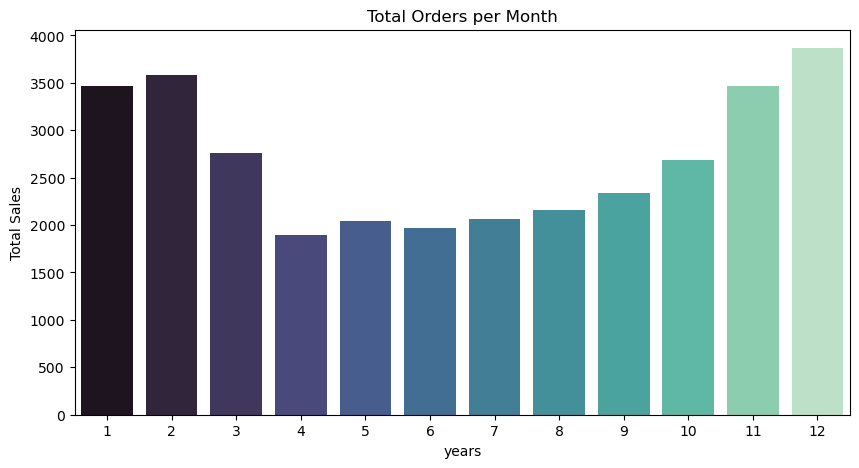

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=Monthly_orders,x='created_at',y='Orders_per_Month',palette='mako')
plt.xlabel("years")
plt.ylabel("Total Sales")
plt.title("Total Orders per Month")
plt.show()

* Orders are high at the start of the year (Jan–Feb), with February being one of the stronger months.
* There is a dip in the middle months (around Apr–Jun), indicating a slowdown in sales activity.
* From July onwards, orders steadily increase, showing recovery and growth.
* The highest sales occur towards the end of the year (Nov–Dec), suggesting strong year-end or festive season demand.

In [61]:
weekly_orders = orders.groupby(orders['created_at'].dt.day_name()).size()
weekly_orders

created_at
Friday       5571
Monday       5662
Saturday     2309
Sunday       2538
Thursday     5414
Tuesday      5320
Wednesday    5499
dtype: int64

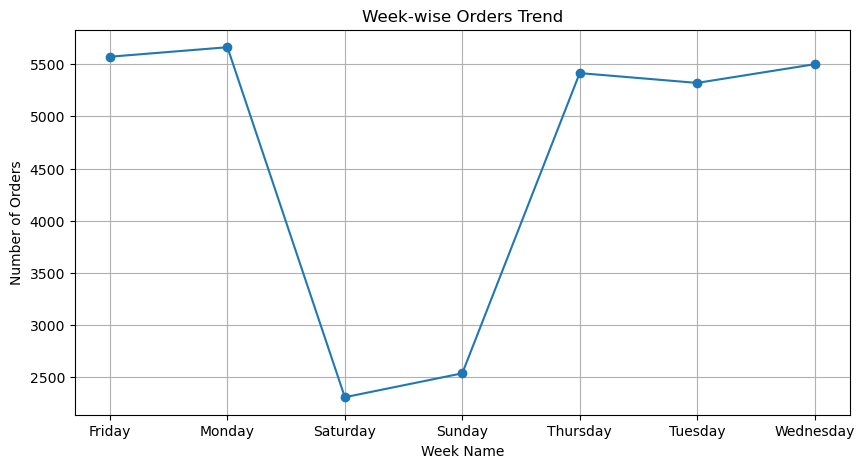

In [62]:
plt.figure(figsize=(10,5))         
plt.plot(weekly_orders, marker='o') 
plt.title("Week-wise Orders Trend")
plt.xlabel("Week Name")
plt.ylabel("Number of Orders")
plt.grid(True)                    
plt.show()


* Weekdays (Monday to Friday) show consistently higher order volumes compared to weekends.
* Monday and Friday record the highest number of orders, indicating strong start and end-of-week activity.
* Saturday has the lowest orders, with Sunday slightly better but still below weekdays.
* Overall, the trend suggests customer activity is much stronger on working days than on weekends.

In [63]:
hourly_orders = orders.groupby(orders['created_at'].dt.hour).size()
hourly_orders

created_at
0      823
1      721
2      586
3      546
4      549
5      566
6      684
7      756
8     1149
9     1661
10    1948
11    2194
12    2172
13    2085
14    2153
15    2188
16    2099
17    1922
18    1593
19    1378
20    1189
21    1192
22    1131
23    1028
dtype: int64

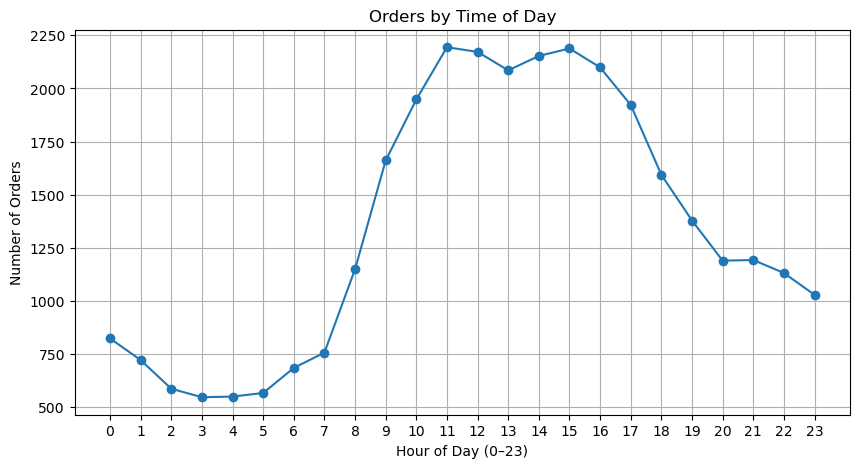

In [64]:
plt.figure(figsize=(10,5))
plt.plot(hourly_orders, marker='o')
plt.title("Orders by Time of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(range(24))
plt.show()

* Orders are lowest during late night and early morning hours (around 2 AM – 6 AM).
* Order volume starts rising sharply from morning (around 8–9 AM) and reaches a peak during late morning to afternoon (around 11 AM – 4 PM).
* The highest activity window is roughly 11 AM to 4 PM, indicating prime shopping hours.
* After evening (around 6 PM onwards), orders gradually decline but remain moderate until late night.
* This suggests daytime and early evening are the best times for promotions and campaigns.

## Refund Trend

In [65]:
refund_table["created_at"] = pd.to_datetime(refund_table["created_at"])

In [66]:
Yearly_Refund_orders = refund_table.groupby(refund_table['created_at'].dt.year).size().reset_index(name="Refunds_per_Year")
Yearly_Refund_orders

,created_at,Refunds_per_Year
0,2012,169
1,2013,339
2,2014,960
3,2015,263


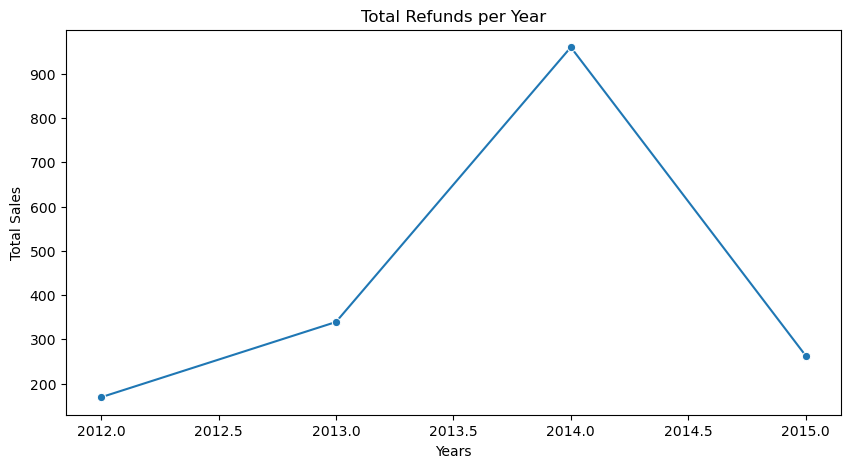

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Yearly_Refund_orders, x='created_at', y='Refunds_per_Year', marker='o')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.title("Total Refunds per Year")
plt.show()


* Refunds increase steadily from 2012 to 2014, showing a rising trend in return activity.
* The highest refunds occur in 2014, indicating a peak in returns that year.
* In 2015, refunds drop sharply compared to 2014, suggesting improvement in product quality, policies, or customer satisfaction.
* Overall, the pattern shows a temporary spike in refunds followed by recovery.

In [68]:
Monthly_Refund_orders = refund_table.groupby(refund_table['created_at'].dt.to_period('M')).size().reset_index(name="Refunds_per_Month")
Monthly_Refund_orders

,created_at,Refunds_per_Month
0,2012-04,5
1,2012-05,5
2,2012-06,5
3,2012-07,13
4,2012-08,18
5,2012-09,21
6,2012-10,24
7,2012-11,40
8,2012-12,38
9,2013-01,21


In [69]:
Monthly_Refund_orders1=refund_table.groupby(refund_table['created_at'].dt.month).size().reset_index(name="Refunds_per_Month")
Monthly_Refund_orders1

,created_at,Refunds_per_Month
0,1,157
1,2,151
2,3,148
3,4,85
4,5,87
5,6,108
6,7,136
7,8,146
8,9,282
9,10,103


C:\Users\Admin\AppData\Local\Temp\ipykernel_25068\4045890746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Monthly_Refund_orders1,x='created_at',y='Refunds_per_Month',palette='summer')


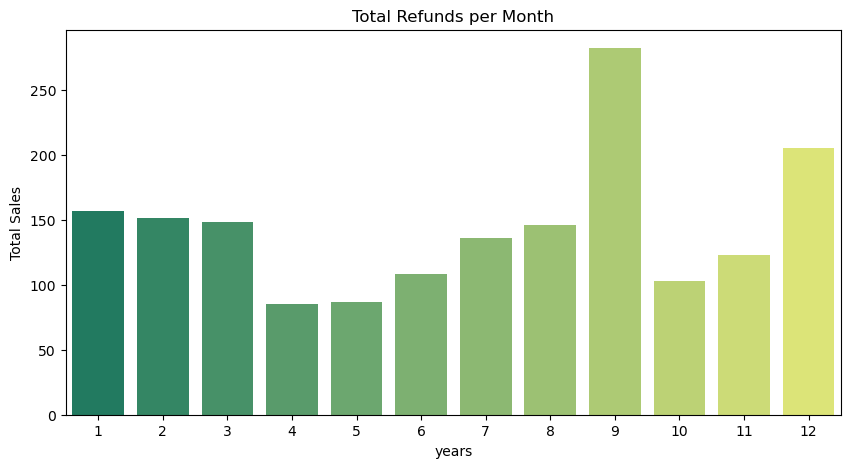

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(data=Monthly_Refund_orders1,x='created_at',y='Refunds_per_Month',palette='summer')
plt.xlabel("years")
plt.ylabel("Total Sales")
plt.title("Total Refunds per Month")
plt.show()

* Refunds decrease from the start of the year and are lowest around Months 4–5.
* From Month 6 onward, refunds rise steadily and peak sharply in Month 9.
* After the peak, refunds drop in Month 10 but increase again toward year-end.
* Overall, the data shows clear seasonal variation in refund activity across the year.

### ECOMMERCE GROWTH ENGINE

In [71]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [72]:
data_dict=pd.read_csv('data/data_dictionary.csv')
sessions = pd.read_csv("data/website_sessions.csv")
pageviews = pd.read_csv("data/website_pageviews.csv")
orders = pd.read_csv("data/orders.csv")
order_items = pd.read_csv("data/order_items.csv")
refunds = pd.read_csv("data/order_item_refunds.csv")
products = pd.read_csv("data/products.csv")

In [73]:
data_dict


,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed


In [74]:
products

,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


In [75]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [76]:
order_items

,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49
...,...,...,...,...,...,...,...
40020,40021,2015-03-19 04:10:43,32310,4,1,29.99,9.49
40021,40022,2015-03-19 05:27:28,32311,2,1,59.99,22.49
40022,40023,2015-03-19 05:27:28,32311,4,0,29.99,9.49
40023,40024,2015-03-19 05:35:57,32312,4,1,29.99,9.49


#### PRODUCT SALES VOLUME

In [77]:
product_sales = order_items.groupby('product_id')['order_item_id'].count().reset_index() 
product_sales.columns = ['product_id', 'Units_sold'] 

In [78]:
product_sales

,product_id,Units_sold
0,1,24226
1,2,5796
2,3,4985
3,4,5018


#### PRODUCT WISE REFUND COUNT

refunds

In [79]:
refunds_products = (refunds.merge( order_items, on='order_item_id', how='inner' ))
refunds_products

,order_item_refund_id,created_at_x,order_item_id,order_id_x,refund_amount_usd,created_at_y,order_id_y,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-04-06 11:32:43,57,57,49.99,2012-03-31 02:32:43,57,1,1,49.99,19.49
1,2,2012-04-13 01:09:43,74,74,49.99,2012-04-03 19:09:43,74,1,1,49.99,19.49
2,3,2012-04-15 07:03:48,71,71,49.99,2012-04-03 15:03:48,71,1,1,49.99,19.49
3,4,2012-04-17 20:00:37,118,118,49.99,2012-04-15 09:00:37,118,1,1,49.99,19.49
4,5,2012-04-22 20:53:49,116,116,49.99,2012-04-13 14:53:49,116,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...,...,...,...
1726,1727,2015-03-30 09:37:23,39950,32255,59.99,2015-03-18 10:37:23,32255,2,1,59.99,22.49
1727,1728,2015-03-30 21:33:51,39671,32049,49.99,2015-03-15 15:33:51,32049,1,1,49.99,19.49
1728,1729,2015-03-31 19:59:48,39729,32090,49.99,2015-03-16 10:59:48,32090,1,1,49.99,19.49
1729,1730,2015-04-01 03:54:48,39717,32079,59.99,2015-03-16 08:54:48,32079,2,0,59.99,22.49


In [80]:
refund_counts = refunds_products.groupby('product_id')['order_item_id'].count().reset_index()
refund_counts.columns = ['product_id', 'total_refunds']

In [81]:
refund_counts

,product_id,total_refunds
0,1,1237
1,2,129
2,3,301
3,4,64


#### NET REVENUE

In [82]:
total_units_sold=product_sales["Units_sold"].sum()# revenue without considering refunds
total_units_sold

40025

In [83]:
total_revenue=orders["price_usd"].sum()# revenue without considering refunds
total_revenue

1938509.7500000002

In [84]:
refunded_revenue =refunds_products['price_usd'].sum()
refunded_revenue

85338.69

In [85]:
net_revenue_generated = total_revenue - refunded_revenue
net_revenue_generated


1853171.0600000003

#### AVERAGE ORDER VALUE

In [86]:
average_order_value = orders["price_usd"].mean()
average_order_value

59.99163649305234

#### REFUND RATES NALYSIS

In [87]:
prod_refund = pd.merge( refund_counts, product_sales, on="product_id")
prod_refund

,product_id,total_refunds,Units_sold
0,1,1237,24226
1,2,129,5796
2,3,301,4985
3,4,64,5018


In [88]:
prod_refund["refund_rate_%"]=(prod_refund['total_refunds']/prod_refund['Units_sold'])*100

In [89]:
prod_refund

,product_id,total_refunds,Units_sold,refund_rate_%
0,1,1237,24226,5.106084
1,2,129,5796,2.225673
2,3,301,4985,6.038114
3,4,64,5018,1.275409


In [90]:
#to know the best performing product
prod_refund.sort_values(
    by=['refund_rate_%'],
    ascending=True
)

,product_id,total_refunds,Units_sold,refund_rate_%
3,4,64,5018,1.275409
1,2,129,5796,2.225673
0,1,1237,24226,5.106084
2,3,301,4985,6.038114


In [91]:
#to know the worst
prod_refund.sort_values(
    by='refund_rate_%',
    ascending=False
)

,product_id,total_refunds,Units_sold,refund_rate_%
2,3,301,4985,6.038114
0,1,1237,24226,5.106084
1,2,129,5796,2.225673
3,4,64,5018,1.275409


<Axes: title={'center': 'Refund Rate by Product'}, xlabel='product_id'>

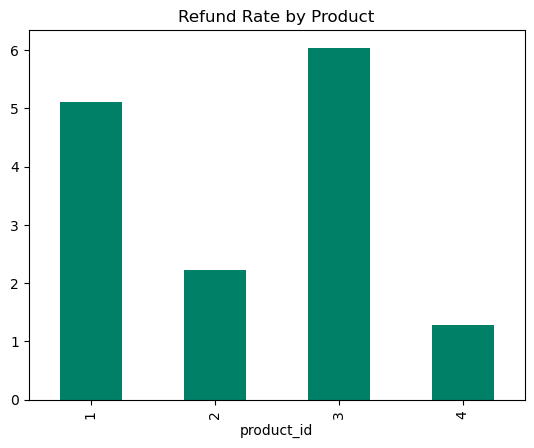

In [92]:
prod_refund.set_index('product_id')['refund_rate_%'].plot(kind='bar',colormap='summer',title='Refund Rate by Product')

* Product 3 has the highest refund rate, making it the most problematic in terms of returns.
* Product 1 also shows a relatively high refund rate, though lower than Product 3.
* Product 4 has the lowest refund rate, indicating better customer satisfaction or fit.
* Overall, refund rates vary significantly by product, suggesting product-specific issues rather than a general trend.

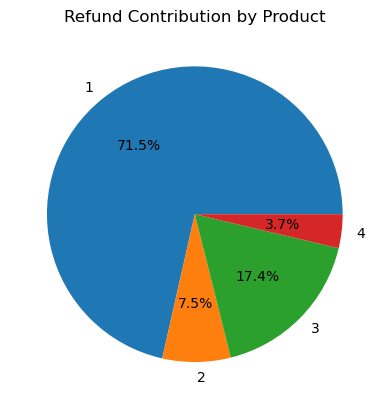

In [93]:
prod_refund.set_index('product_id')['total_refunds'].plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Refund Contribution by Product'
)
plt.ylabel('')
plt.show()

#### SPECIFIC SALE OF EACH PRODUCT

In [94]:
sales_per_product = order_items.groupby('product_id')['price_usd'].sum().reset_index()
sales_per_product.columns = ['product_id', 'sales_revenue']
sales_per_product 

,product_id,sales_revenue
0,1,1211057.74
1,2,347702.04
2,3,229260.15
3,4,150489.82


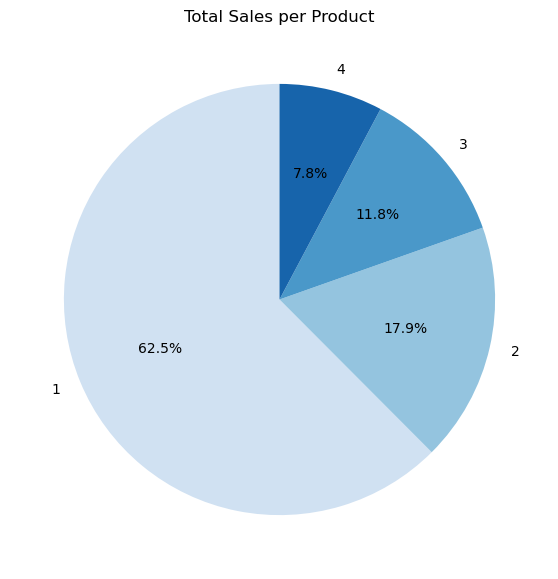

In [95]:
import seaborn as sns
colors = sns.color_palette("Blues", len(sales_per_product))
plt.figure(figsize=(7,7))
plt.pie(sales_per_product['sales_revenue'],labels=sales_per_product['product_id'].astype(str),autopct='%1.1f%%',startangle=90,colors=colors)
plt.title("Total Sales per Product")
plt.show()

* Product 1 dominates the distribution, contributing about 62.5% of the total.
* Product 2 is the second-largest contributor with around 17.9%.
* Product 3 accounts for a moderate share (~11.8%), while Product 4 contributes the least (~7.8%).

* Overall, the distribution is highly skewed toward Product 1, with the other products making up a much smaller share.

In [96]:
refund_per_product = refunds_products.groupby('product_id')['refund_amount_usd'].sum().reset_index()

In [97]:
refund_per_product

,product_id,refund_amount_usd
0,1,61837.63
1,2,7738.71
2,3,13842.99
3,4,1919.36


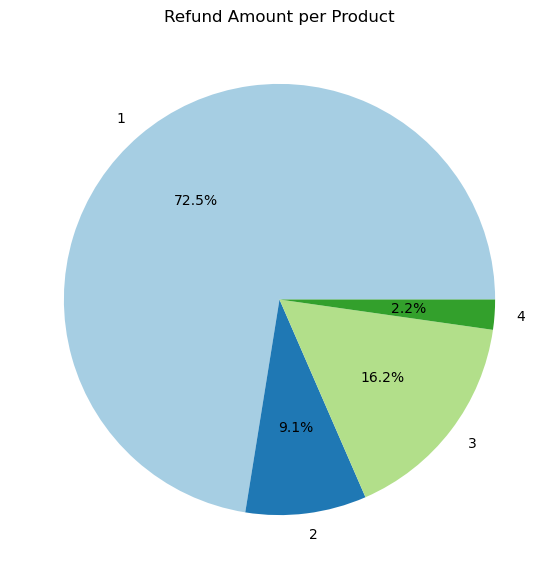

In [98]:
plt.figure(figsize=(7,7))

plt.pie(
    refund_per_product['refund_amount_usd'],
    labels=refund_per_product['product_id'].astype(str),
    autopct='%1.1f%%',
    colors=sns.color_palette("Paired", len(refund_per_product))
)

plt.title("Refund Amount per Product")
plt.show()

* Product 1 accounts for the majority of refund amount (~72.5%), dominating total refunds.
* Product 3 is the second-largest contributor (~16.2%), but far behind Product 1.
* Product 2 contributes a smaller share (~9.1%) of the total refund amount.
* Product 4 has a minimal impact (~2.2%), indicating very low refund value compared to others.

In [99]:
prod_info=pd.merge(sales_per_product,refund_per_product,on='product_id')

In [100]:
prod_info

,product_id,sales_revenue,refund_amount_usd
0,1,1211057.74,61837.63
1,2,347702.04,7738.71
2,3,229260.15,13842.99
3,4,150489.82,1919.36


In [101]:
prod_info['net_revenue'] = prod_info['sales_revenue'] - prod_info['refund_amount_usd']

In [102]:
prod_info

,product_id,sales_revenue,refund_amount_usd,net_revenue
0,1,1211057.74,61837.63,1149220.11
1,2,347702.04,7738.71,339963.33
2,3,229260.15,13842.99,215417.16
3,4,150489.82,1919.36,148570.46


In [103]:
prod_info['net_revenue'].sum()

1853171.06

C:\Users\Admin\AppData\Local\Temp\ipykernel_25068\679428795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='summer')


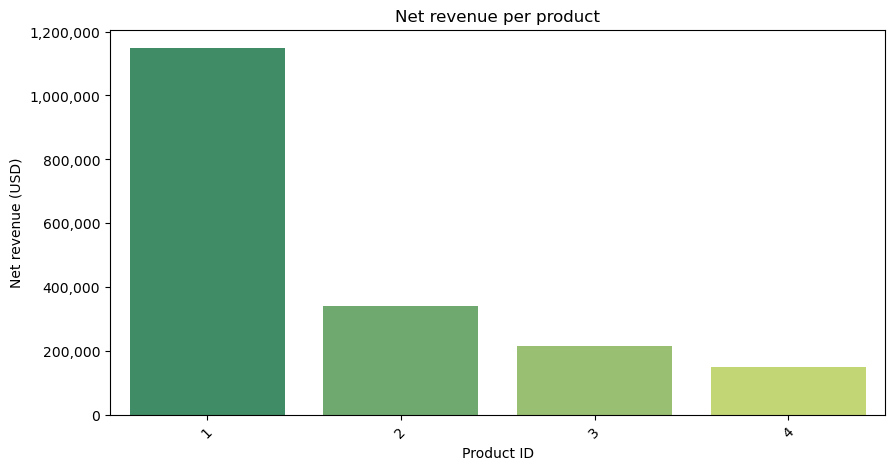

In [104]:
plt.figure(figsize=(10,5))
sns.barplot( data=prod_info, x='product_id', y='net_revenue', palette='summer')
plt.xlabel("Product ID")
plt.ylabel("Net revenue (USD)")
plt.title("Net revenue per product")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()

* Product 1 generates by far the highest net revenue, significantly outperforming all other products.
* Product 2 is a distant second, with much lower net revenue than Product 1.
* Products 3 and 4 contribute relatively smaller shares to total net revenue.
* Overall, revenue is heavily concentrated in Product 1, indicating strong dependence on a single product.

#### CUSTOMER LIFECYCLE ANALYSIS

In [105]:
orders

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49
...,...,...,...,...,...,...,...,...
32308,32309,2015-03-19 03:58:12,472795,394255,1,1,49.99,19.49
32309,32310,2015-03-19 04:10:43,472798,394257,4,1,29.99,9.49
32310,32311,2015-03-19 05:27:28,472809,394268,2,2,89.98,31.98
32311,32312,2015-03-19 05:35:57,472814,394273,4,1,29.99,9.49


In [106]:
customer_orders = orders.groupby('user_id')['order_id'].count().reset_index()
customer_orders.columns = ['user_id', 'total_orders']
#We first count how many orders each customer placed.

In [107]:
customer_orders

,user_id,total_orders
0,13,1
1,20,1
2,59,1
3,104,1
4,147,1
...,...,...
31691,394231,1
31692,394255,1
31693,394257,1
31694,394268,1


In [108]:
customer_orders['total_orders'].unique()

array([1, 2, 3], dtype=int64)

In [109]:
customer_orders['customer_type'] = 'New'
customer_orders.loc[customer_orders['total_orders'] > 1, 'customer_type'] = 'Repeat'
#to know the repeat customer according to the number of order placed by them 

In [110]:
customer_orders

,user_id,total_orders,customer_type
0,13,1,New
1,20,1,New
2,59,1,New
3,104,1,New
4,147,1,New
...,...,...,...
31691,394231,1,New
31692,394255,1,New
31693,394257,1,New
31694,394268,1,New


In [111]:
customer_orders['customer_type'].unique()

array(['New', 'Repeat'], dtype=object)

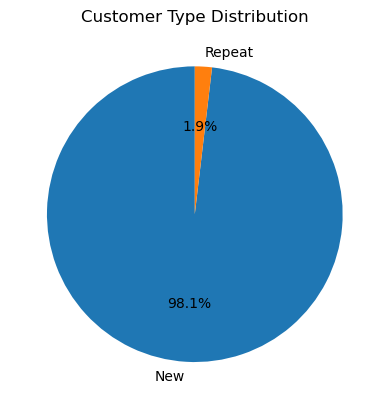

In [112]:
a= customer_orders['customer_type'].value_counts(normalize=True) * 100
plt.figure()
plt.pie(a,labels=a.index,autopct='%1.1f%%',startangle=90)
plt.title('Customer Type Distribution')
plt.show()

* Compares new customers and repeat customers.
* Majority of customers are new customers.
* Indicates good customer acquisition but low repeat purchase rate.

In [119]:
df = (
    order_items
    .merge(orders, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(refunds, on="order_item_id", how="left", suffixes=("", "_refund"))
)
import pandas as pd

df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")


In [129]:
df["is_refunded"] = df["order_item_refund_id"].notna()
df[["order_item_refund_id", "is_refunded"]].head()


,order_item_refund_id,is_refunded
0,NaN,False
1,NaN,False
2,NaN,False
3,NaN,False
4,NaN,False


In [ ]:
df["month"] = pd.to_datetime(df["created_at"]).dt.to_period("M").dt.to_timestamp()
orders_over_time = (df.groupby("month").size().reset_index(name="order_count"))
px.line(orders_over_time,x="month",y="order_count",title="Orders Trend Over Time (Monthly)",markers=True).show()


* This line chart shows how the number of orders changes over time on a monthly basis.
* Orders are highest in early 2012 and then drop sharply by early 2013.
* After that, the order count remains relatively stable at a lower level, indicating a slowdown or stabilization in demand.

In [131]:
df.columns


Index(['order_item_id', 'created_at_x', 'order_id', 'product_id',
       'is_primary_item', 'price_usd_x', 'cogs_usd_x', 'created_at_y',
       'website_session_id', 'user_id', 'primary_product_id',
       'items_purchased', 'price_usd_y', 'cogs_usd_y', 'created_at',
       'product_name', 'order_item_refund_id', 'created_at_refund',
       'order_id_refund', 'refund_amount_usd', 'is_refunded'],
      dtype='object')

In [162]:
import plotly.express as px
product_sales = (df.groupby("product_name")["price_usd_x"].sum().reset_index(name="total_sales_usd").sort_values("total_sales_usd", ascending=False))
px.bar(product_sales,x="product_name",y="total_sales_usd",title="Top Products by Total Sales (USD)").show()



* This bar chart shows the total revenue generated by each product.
* The Original Mr. Fuzzy generates significantly higher sales than all other products.
* The Forever Love Bear and The Birthday Sugar Panda contribute moderate revenue, while The Hudson River Mini Bear has the lowest sales.

In [173]:

import plotly.express as px
df["is_refunded"] = df["order_item_refund_id"].notna()
refund_rate_product = (df.groupby("product_name").agg(refund_rate=("is_refunded", "mean")).reset_index())
top_refund_products = refund_rate_product.sort_values("refund_rate", ascending=False).head(10)
px.bar(top_refund_products,x="product_name",y="refund_rate",title="Top Products by Refund Rate").show()


* Compares products based on their refund rate (refunds ÷ total orders).
* The Birthday Sugar Panda has the highest refund rate, making it the most problematic product.
* The Hudson River Mini Bear has the lowest refund rate, indicating better customer satisfaction.

In [ ]:
df["year"] = df["created_at_y"].dt.to_period("Y").astype(str)
orders_over_time = (df.groupby("year").size().reset_index(name="order_count"))
import plotly.express as px
px.line(orders_over_time,x="year",y="order_count",title="Orders Trend Over Time (Monthly)",markers=True).show()



* Shows how the total number of orders changes over the years.
* Orders increase from 2012 to 2014, indicating strong business growth.
* There is a decline in 2015, which may suggest market slowdown or incomplete data for that year.